In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('loyalty_clean.csv')
df.head()

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.30,5,Asia/Pacific,10-May,Nov,No
1,2,106.45,16.20,14,Asia/Pacific,10-May,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10-May,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,5-Mar,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,5-Mar,Apr,Yes


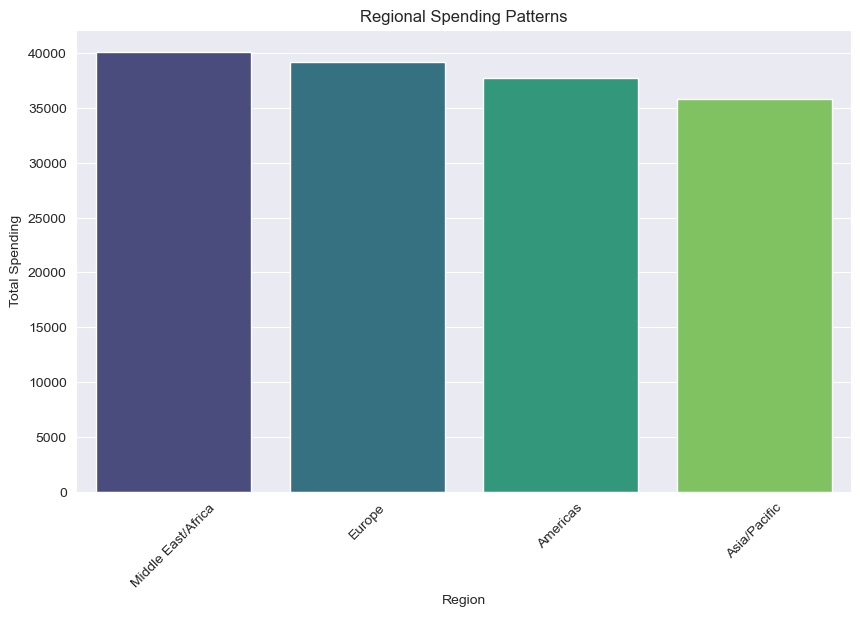

In [3]:
# Group the data by 'region' and calculate aggregate spending
region_spending = df.groupby('region')['spend'].sum().sort_values(ascending=False)

# Visualize the distribution of spending across regions
plt.figure(figsize=(10, 6))
sns.barplot(x=region_spending.index, y=region_spending.values, palette='viridis')
plt.title('Regional Spending Patterns')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Group the data by both 'region' and 'promotion' columns
region_promotion_group = df.groupby(['region', 'promotion'])

# Calculate additional engagement metrics such as retention rates and average items purchased
engagement_metrics = region_promotion_group.agg({
    'spend': 'mean',  # Average spending
    'items_in_first_month': 'mean', # Average items purchased in the first month
    'customer_id': 'nunique' # Number of unique customers
})
retention_period = 12  # 12 months
# Convert 'joining_month' to datetime format
df['joining_month'] = pd.to_datetime(df['joining_month'], format='%b')
# Calculate the date when each customer joined the loyalty program
df['joining_date'] = df['joining_month'] + pd.offsets.MonthBegin()
# Calculate the maximum date in the dataset
max_date = df['joining_date'].max()
# Define the end date of the retention period
end_date = max_date + pd.offsets.MonthEnd(retention_period)
# Calculate retention rate (percentage of customers who remained active)
retention_rate = region_promotion_group.apply(lambda x: x[x['joining_date'] <= (end_date - pd.offsets.DateOffset(years=1))]['customer_id'].nunique() / x['customer_id'].nunique() * 100)

# Add retention rate to the engagement metrics dataframe
engagement_metrics['retention_rate'] = retention_rate

# Print the engagement metrics for each region and promotion combination
print(engagement_metrics)

                                   spend  items_in_first_month  customer_id  \
region             promotion                                                  
Americas           No         123.083677              8.993548          155   
                   Yes        120.815195              9.558442          154   
Asia/Pacific       No         123.301104              9.006494          154   
                   Yes        122.808102              9.291971          137   
Europe             No         122.331938              9.937500          160   
                   Yes        122.756375              9.425000          160   
Middle East/Africa No         123.791325              9.644578          166   
                   Yes        122.161062              9.437500          160   

                              retention_rate  
region             promotion                  
Americas           No              99.354839  
                   Yes             96.753247  
Asia/Pacific       No

The engagement metrics for each combination of region and promotion:


| Region            | Promotion | Average Spending | Average Items in First Month | Customer Count | Retention Rate |
|-------------------|-----------|------------------|------------------------------|----------------|----------------|
| Americas          | No        | 123.08           | 8.99                         | 155            | 99.35%         |
|                   | Yes       | 120.82           | 9.56                         | 154            | 96.75%         |
| Asia/Pacific      | No        | 123.30           | 9.01                         | 154            | 96.75%         |
|                   | Yes       | 122.81           | 9.29                         | 137            | 93.43%         |
| Europe            | No        | 122.33           | 9.94                         | 160            | 93.13%         |
|                   | Yes       | 122.76           | 9.43                         | 160            | 95.63%         |
| Middle East/Africa| No        | 123.79           | 9.64                         | 166            | 96.39%         |
|                   | Yes       | 122.16           | 9.44                         | 160            | 95.63%         |

These metrics provide insights into regional spending patterns and the effectiveness of promotions in different regions. For example, in the Americas region, customers who did not join as part of a promotion had slightly higher average spending compared to those who did join with a promotion. Additionally, the retention rate varies across regions and promotion types, indicating differences in customer engagement and loyalty.

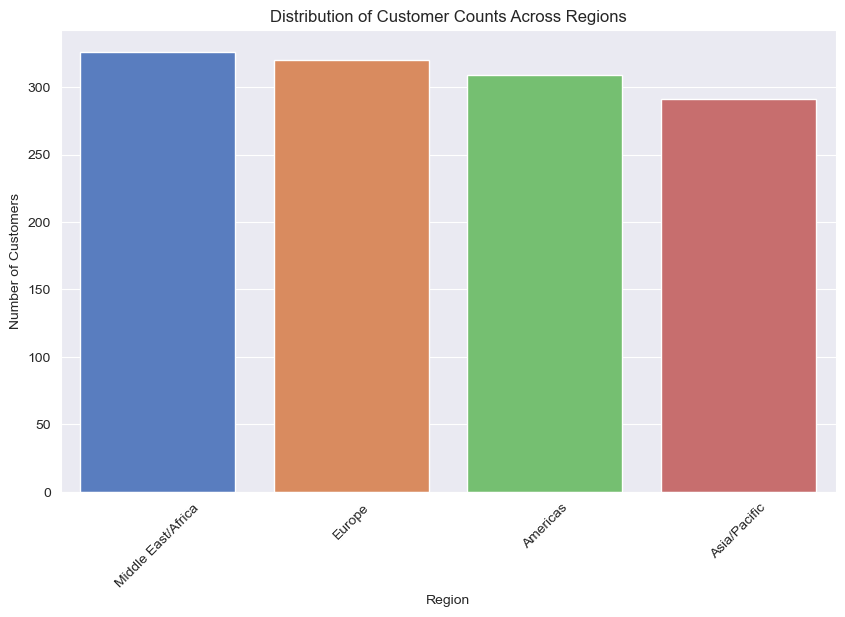

In [7]:
# Group the data by 'region' and calculate the total number of customers in each region
region_customer_counts = df.groupby('region')['customer_id'].count().sort_values(ascending=False)

# Visualize the distribution of customer counts across regions
plt.figure(figsize=(10, 6))
sns.barplot(x=region_customer_counts.index, y=region_customer_counts.values, palette='muted')
plt.title('Distribution of Customer Counts Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()